<a href="https://colab.research.google.com/github/Woong23/Project02/blob/main/ai_12_project4_%EC%A0%84%EC%9D%B8%EC%9B%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install beautifulsoup4

In [1]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.3 MB 6.2 MB/s 


In [3]:
!pip install webdriver-manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 7.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.5 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
#라이브러리 불러오기
from selenium import webdriver
import time
from urllib.request import (urlopen, urlparse, urlunparse, urlretrieve)

In [13]:
# 구글 이미지 url
# 크롬 드라이브 경로가 너무 복잡하면 에러가나기 떄문에 새로 인스톨 후 가까운 경로로 설정

chrome_path ='C:/chromedriver/chromedriver'
base_url = "https://www.google.co.kr/imghp"

In [9]:
chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless') # 창 없는 모드
# headless 모드의 호환성을 위해 아래 옵션 추가(가끔 막는 웹이 있음)
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36")
chrome_options.add_argument("lang=ko_KR") # 한국어
chrome_options.add_argument('window-size=1920x1080')
#chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--disable-dev-shm-usage')


driver = webdriver.Chrome(chrome_path,chrome_options=chrome_options)
driver.get(base_url)
driver.implicitly_wait(3) # element가 로드될 때까지 지정한 시간만큼 대기할 수 있도록 설정
driver.get_screenshot_as_file('google_screen.png')
driver.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


WebDriverException: ignored

In [10]:
def selenium_scroll_option():
  SCROLL_PAUSE_SEC = 3
  
  # 스크롤 높이 가져옴
  last_height = driver.execute_script("return document.body.scrollHeight")
  
  while True:
    # 끝까지 스크롤 다운
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 1초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = driver.execute_script("return document.body.scrollHeight")
  
    if new_height == last_height:
        break
    last_height = new_height

In [11]:
# 검색어로 이미지 크롤링 하기
car = './car/'
truck = './truck/'
bus= './bus/'

In [14]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import urllib.request
import os
import pandas as pd

# 키워드 검색하기

a=input("검색할 키워드를 입력 : ")
image_name = input("저장할 이미지 이름 : ")
#b=int(input("몇 개 저장할래? : "))
driver = webdriver.Chrome(chrome_path)
driver.get('http://www.google.co.kr/imghp?hl=ko')
browser = driver.find_element_by_name("q")
browser.send_keys(a)
browser.send_keys(Keys.RETURN)



# 클래스를 찾고 해당 클래스의 src 리스트를 만들자

selenium_scroll_option() # 스크롤하여 이미지를 많이 확보
driver.find_elements_by_xpath('//*[@id="islmp"]/div/div/div/div/div[3]/div[2]/input')[0].click() # 이미지 더보기 클릭
selenium_scroll_option()



'''이미지 src요소를 리스트업해서 이미지 url 저장'''

images = driver.find_elements_by_css_selector(".rg_i.Q4LuWd") #  클래스 네임에서 공백은 .을 찍어줌
images_url = []
for i in images: 
   
   if i.get_attribute('src')!= None :
        images_url.append(i.get_attribute('src'))
   else :
       images_url.append(i.get_attribute('data-src'))
driver.close()



# 겹치는 이미지 url 제거

print("전체 다운로드한 이미지 개수: {}\n동일한 이미지를 제거한 이미지 개수: {}".format(len(images_url), len(pd.DataFrame(images_url)[0].unique())))
images_url=pd.DataFrame(images_url)[0].unique()


        
#'''해당하는 파일에 이미지 다운로드'''        
#        
#if image_name == 'shark' :   
#   for t, url in enumerate(images_url, 0):        
#      urlretrieve(url, shark + image_name + '_' + str(t) + '.jpg')
#   driver.close()
#   
#elif image_name == 'whale' :
#   for t, url in enumerate(images_url, 0):        
#      urlretrieve(url, whale + image_name + '_' + str(t) + '.jpg')
#   driver.close()    
#
#elif image_name == 'dolphin' :
#   for t, url in enumerate(images_url, 0):        
#      urlretrieve(url, dolphin + image_name + '_' + str(t) + '.jpg')
#   driver.close()
#

검색할 키워드를 입력 : car
저장할 이미지 이름 : car


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  del sys.path[0]


WebDriverException: ignored

In [3]:
!pip install git+https://github.com/tensorflow/examples.git
!pip install -U tfds-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-5t6filot
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-5t6filot
  Created wheel for tensorflow-examples: filename=tensorflow_examples-c62c9ec403b441913c987cacdfaf4d7a0bf0e7f2_-py3-none-any.whl size=299285 sha256=22a3e5ed998a1c2711bc2245cf756f9c1081196eb3bf60062dda181d0e661516
  Stored in directory: /tmp/pip-ephem-wheel-cache-d6vs6nl9/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/i

In [1]:
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dataset oxford_iiit_pet downloaded and prepared to ~/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [15]:
def normalize(input_image, input_mask):
    """
    이미지를 정규화하는 코드입니다.
    각 픽셀값을 최댓값인 255로 나누어줍니다.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [16]:
@tf.function
def load_image_train(datapoint):
    """
    훈련 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 이미지 증강에 해당하는 filp 및 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [17]:
def load_image_test(datapoint):
    """
    시험 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [18]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [19]:
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [20]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [21]:
def display(display_list):
    """
    입력 이미지와 타겟 레이블, 예측 레이블의 결과를 시각화하는 함수입니다.
    """
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

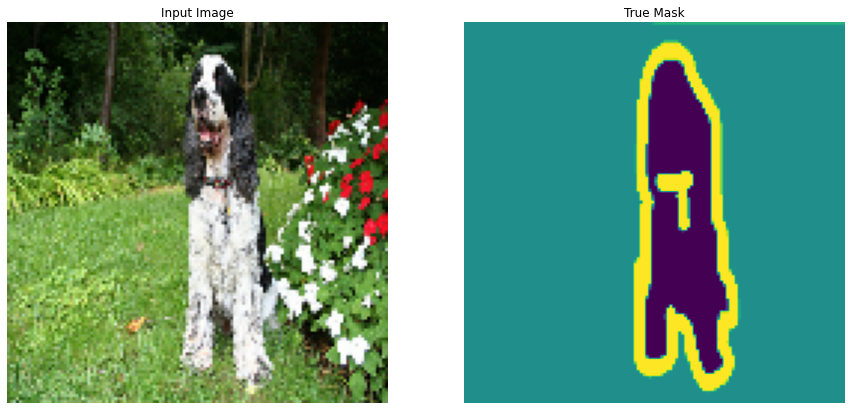

In [23]:
for image, mask in train.take(2):
    sample_image, sample_mask = image, mask

display([sample_image, sample_mask])

In [24]:
OUTPUT_CHANNELS = 3

In [25]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]


down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [26]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [27]:
def unet_model(output_channels):
    """
    모델을 정의하는 함수입니다.
    """
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

    # Downsampling을 진행하는 부분입니다.
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling을 진행하는 부분입니다.
    for up, skip in zip(up_stack, skips):
        x = up(x)
        # Downsampling 결과를 Concatenate 해줍니다.
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # 출력되는 이미지 크기를 동일하게 하기 위해 마지막 층을 구현합니다.
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [28]:
model = unet_model(OUTPUT_CHANNELS)

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 64, 64, 96)  1841984     ['input_2[0][0]']                
                                , (None, 32, 32, 14                                               
                                4),                                                               
                                 (None, 16, 16, 192                                               
                                ),                                                          

In [31]:
def create_mask(pred_mask):
    """
    예측 시 픽셀의 레이블을 확정하는 함수입니다.
    """
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [32]:
def show_predictions(dataset=None, num=1):
    """
    예측한 레이블을 시각화하는 함수입니다.
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                create_mask(model.predict(sample_image[tf.newaxis, ...]))])

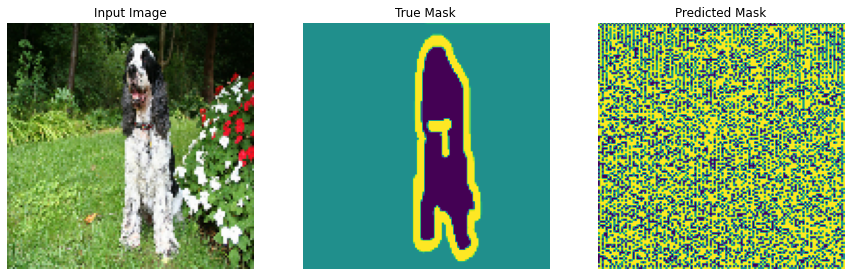

In [33]:
show_predictions()

In [34]:
class DisplayCallback(tf.keras.callbacks.Callback):
    """
    에포크마다 보여줄 수 있되
    매 에포크마다 이전 결과가 지워지도록 하는 Callback 클래스 입니다.
    """
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\n에포크 이후 예측 예시 {}\n'.format(epoch+1))

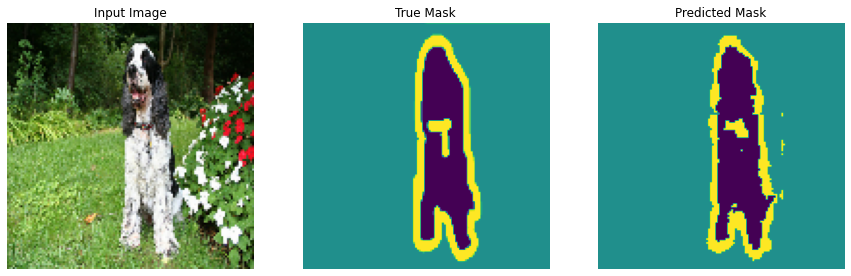


에포크 이후 예측 예시 20

57/57 [==============================] - 283s 5s/step - loss: 0.1363 - accuracy: 0.9378 - val_loss: 0.3166 - val_accuracy: 0.8920


In [35]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])